In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.manifold import TSNE

In [2]:
df_train = pd.read_parquet('train_163188_v2.parquet')

In [3]:
df_test = pd.read_parquet("test_15k_v2.parquet")

In [4]:
df_train['label'] = 1.0 * (df_train['label_truth_bool'])

df_test['label'] = 1.0 * (df_test['label_truth_bool'])
#df_test['score_llm'] = 1.0 * (df_test['pred_llm']=='Irrelevant') 
# df_test['naive_combine']  = 1.0*(df_test['score_lr']>=0.55)*(df_test['pred_lr']=='Irrelevant')+1.0*(
#     df_test['score_lr']<0.55)*(df_test['score_lr']>=0.45)* (df_test['pred_llm']=='Irrelevant') 

In [5]:
df_train

,id,query,product_name,embedding_concat,score_lr,pred_lr_bool,label_truth_bool,label
0,0,salon chair,21.7 '' w waiting room chair with wood frame,"[0.044921443, 0.013315084, -0.05547765, 0.0244...",0.144580,0,0,0.0
1,68634,leather chairs,21.7 '' w waiting room chair with wood frame,"[0.038483035, 0.022960352, -0.03406253, 0.0087...",0.129384,0,0,0.0
2,85371,kids chair,21.7 '' w waiting room chair with wood frame,"[0.024312073, 0.013019967, -0.041334826, 0.028...",0.232655,0,0,0.0
3,90015,leather chair,21.7 '' w waiting room chair with wood frame,"[0.023832208, 0.029836884, -0.035543874, 0.006...",0.104726,0,0,0.0
4,91500,wishbone chair,21.7 '' w waiting room chair with wood frame,"[0.055274807, 0.03576432, -0.03429918, -0.0157...",0.038198,0,0,0.0
...,...,...,...,...,...,...,...,...
233442,202021,rack glass,lightrail 2.75 '' h x 2.75 '' w glass bell pen...,"[0.0538197, 0.058119502, -0.0018294473, 0.0017...",0.809519,1,1,1.0
233443,202100,rack glass,glass bell lamp shade ( screw on ),"[0.01190137, 0.05741629, -0.015940381, -0.0396...",0.818407,1,1,1.0
233444,202120,rack glass,dunlevy 8.5 '' h glass oval pendant shade ( sc...,"[0.04674753, 0.086528674, -0.0129089635, -0.01...",0.478398,0,1,1.0
233445,202461,rack glass,gearoid 4.5 '' h x 3.25 '' w glass empire pend...,"[0.0037543399, 0.07997203, 0.012854578, -0.031...",0.649529,1,1,1.0


In [6]:
df_test

,id,query,product_name,embedding_concat,score_lr,pred_lr_bool,pred_llm_bool,label_truth_bool,pred_combine_bool,label
84058,173762,wall shelves,absecon beveled frameless wall mirror,"[0.017602663, 0.037117176, 0.059629787, -0.049...",0.024122,0,0,0,0,0.0
84098,183856,bathroom lighting,mirror damask 6 piece bathroom accessory set,"[0.024119053, -0.05305454, 0.051695846, -0.022...",0.804296,1,0,0,1,0.0
84099,206741,driftwood mirror,toader on the door full length mirror,"[0.019502275, 0.0050948146, -0.048834916, -0.0...",0.493834,0,1,1,1,1.0
84101,132752,meade mirror,toader on the door full length mirror,"[0.010465013, -0.0020181255, -0.0044971625, -0...",0.350039,0,1,1,1,1.0
84103,38673,sliding closet mirror,toader on the door full length mirror,"[0.003429554, 0.011621186, 0.011456227, 0.0052...",0.574683,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
233398,50064,54 in bench cushion,angilia indoor/outdoor bench cushion,"[-0.022696972, 0.014638491, 0.04876254, -0.003...",0.047256,0,0,0,0,0.0
233401,50067,54 in bench cushion,bench cushion,"[-0.022436056, 0.016327193, 0.06304426, -0.022...",0.022138,0,0,0,0,0.0
233411,50078,54 in bench cushion,devrek indoor/outdoor bench cushion,"[0.019650571, 0.05350141, 0.08619862, -0.02084...",0.026347,0,0,0,0,0.0
233420,50093,54 in bench cushion,luxury indoor/outdoor bench cushion,"[-0.029456146, -0.010167001, 0.045744978, -0.0...",0.024615,0,0,0,0,0.0


In [41]:
# construct piecewise constant weights to combine LLM and LR scores through first half of the test set and evaluate on the second half
# the weights are constructed by minimizing the MSE of the combined score and the ground truth

num_bins = 10
bins = np.linspace(0, 1, num_bins+1)
bin_centers = (bins[1:] + bins[:-1]) / 2
bin_weights = np.zeros(num_bins)

# randomly split the test set into two halves
np.random.seed(2024)
random_indices = np.random.permutation(df_test.shape[0])
df_test_firsthalf = df_test.iloc[random_indices[:df_test.shape[0]//2]].copy()
df_test_secondhalf = df_test.iloc[random_indices[df_test.shape[0]//2:]].copy()
for i in range(num_bins):
    tmp_data = df_test_firsthalf[(df_test_firsthalf['score_lr'] >= bins[i]) & (df_test_firsthalf['score_lr'] < bins[i+1])]
    bin_weights[i] = np.sum((tmp_data['score_lr']-1.0*tmp_data['pred_llm_bool']) * (tmp_data['label']-1.0*tmp_data['pred_llm_bool']
                                                                          )) / np.sum((tmp_data['score_lr']-1.0*tmp_data['pred_llm_bool'])**2)

test_weights = bin_weights[(df_test_secondhalf['score_lr']*num_bins).astype(int).clip(0, num_bins-1)]
df_test_secondhalf['piecewise_combine_score'] = test_weights * df_test_secondhalf['score_lr'] + (1-test_weights) * df_test_secondhalf['pred_llm_bool']
df_test_secondhalf['piecewise_combine_label'] = 1.0 * (df_test_secondhalf['piecewise_combine_score'] >= 0.5)
    

In [42]:
acc_piecewise_combine = (df_test_secondhalf['piecewise_combine_label']==df_test_secondhalf['label']).mean()
acc_lr = (df_test_secondhalf['pred_lr_bool']==df_test_secondhalf['label_truth_bool']).mean()
acc_llm = (df_test_secondhalf['pred_llm_bool']==df_test_secondhalf['label_truth_bool']).mean()
acc_naive_combine = (df_test_secondhalf['pred_combine_bool']==df_test_secondhalf['label_truth_bool']).mean()
print(acc_piecewise_combine, acc_lr, acc_llm, acc_naive_combine)

0.8350666666666666 0.796 0.7362666666666666 0.8345333333333333


In [9]:
df_train['label'].mean()

0.2616613966713239

In [61]:
calibration_m = 10
df_test['calibration_group'] = (df_test['score_lr'] * calibration_m).astype(int).clip(0, calibration_m-1) + df_test['pred_llm_bool'] * calibration_m

np.random.seed(2022)
random_indices = np.random.permutation(df_test.shape[0])
df_test_firsthalf = df_test.iloc[random_indices[:df_test.shape[0]//2]].copy()
df_test_secondhalf = df_test.iloc[random_indices[df_test.shape[0]//2:]].copy()


calibration_mean_resp = np.zeros(calibration_m*2)
calibration_mean_pred = np.zeros(calibration_m*2)
for i in range(calibration_m*2):
    calibration_mean_resp[i] = df_test_firsthalf[df_test_firsthalf['calibration_group']==i]['label'].mean()
    calibration_mean_pred[i] = df_test_firsthalf[df_test_firsthalf['calibration_group']==i]['score_lr'].mean()

calibration_mean_error = calibration_mean_resp - calibration_mean_pred

df_test_secondhalf['calibrated_score'] = calibration_mean_error[df_test_secondhalf['calibration_group']] + df_test_secondhalf['score_lr']
df_test_secondhalf['calibrated_resp'] = 1.0*(df_test_secondhalf['calibrated_score']>=0.5)

In [62]:
acc_calibrated = (df_test_secondhalf['calibrated_resp']==df_test_secondhalf['label']).mean()
acc_lr = (df_test_secondhalf['pred_lr_bool']==df_test_secondhalf['label_truth_bool']).mean()
print(acc_calibrated,acc_lr)

0.8332 0.7988


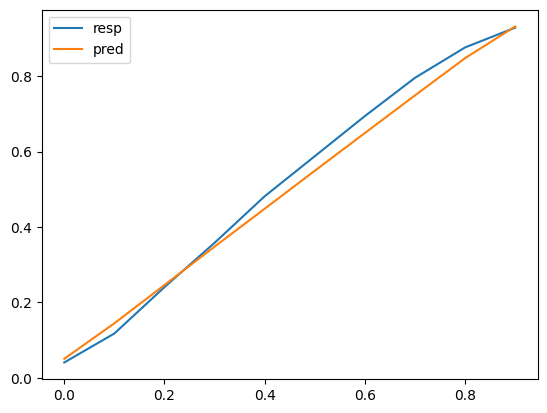

In [44]:
plt.figure()
plt.plot(np.arange(calibration_m)/calibration_m, calibration_mean_resp)
plt.plot(np.arange(calibration_m)/calibration_m, calibration_mean_pred)
plt.legend(['resp', 'pred'])
plt.show()

In [45]:
(df_train['label_truth_bool']==df_train['pred_lr_bool']).mean()

0.8284126283795377

In [49]:
def evaluation(df):
    acc_llm = (df['label_truth_bool'] == df['pred_llm_bool']).mean()
    acc_lr = (df['label_truth_bool'] == df['pred_lr_bool']).mean()
    acc_combine = (df['pred_combine_bool'] == df['label_truth_bool']).mean()
    acc_calibrated = (df['label'] == df['calibrated_resp']).mean()
    acc_linear = (df['label'] == df['linear_combine']).mean()
    return  acc_llm, acc_lr,acc_combine, acc_calibrated, acc_linear

In [50]:
evaluation(df_test)

(0.7334666666666667,
 0.8026,
 0.8346666666666667,
 0.8044666666666667,
 0.8299333333333333)

In [46]:
alpha_star = np.sum((df_test['score_lr']-1.0*df_test['pred_llm_bool']) * (df_test['label']-1.0*df_test['pred_llm_bool']
                                                                          )) / np.sum((df_test['score_lr']-1.0*df_test['pred_llm_bool'])**2)
print(alpha_star)

0.7848702196870144


In [47]:
df_test['linear_combine'] = 1.0*((alpha_star * df_test['score_lr'] + (1-alpha_star) * df_test['pred_llm_bool'])>=0.5)

In [48]:
n_samples = min(2000, len(df_test))

features = np.stack(df_test['embedding_concat'].iloc[:n_samples].values)  # Convert list of arrays to a 2D numpy array
labels = df_test['label'].iloc[:n_samples].values  # Get labels
labels_llm = (1.0*df_test['pred_llm_bool']).iloc[:n_samples].values 
labels_lr = (1.0*(df_test['pred_lr_bool'].iloc[:n_samples])).values
labels_lr_soft = df_test['score_lr'].iloc[:n_samples].values

In [29]:
tsne = TSNE(n_components=2, perplexity=30,  random_state=42)
tsne_results = tsne.fit_transform(features)


c:\Users\hasee\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\hasee\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


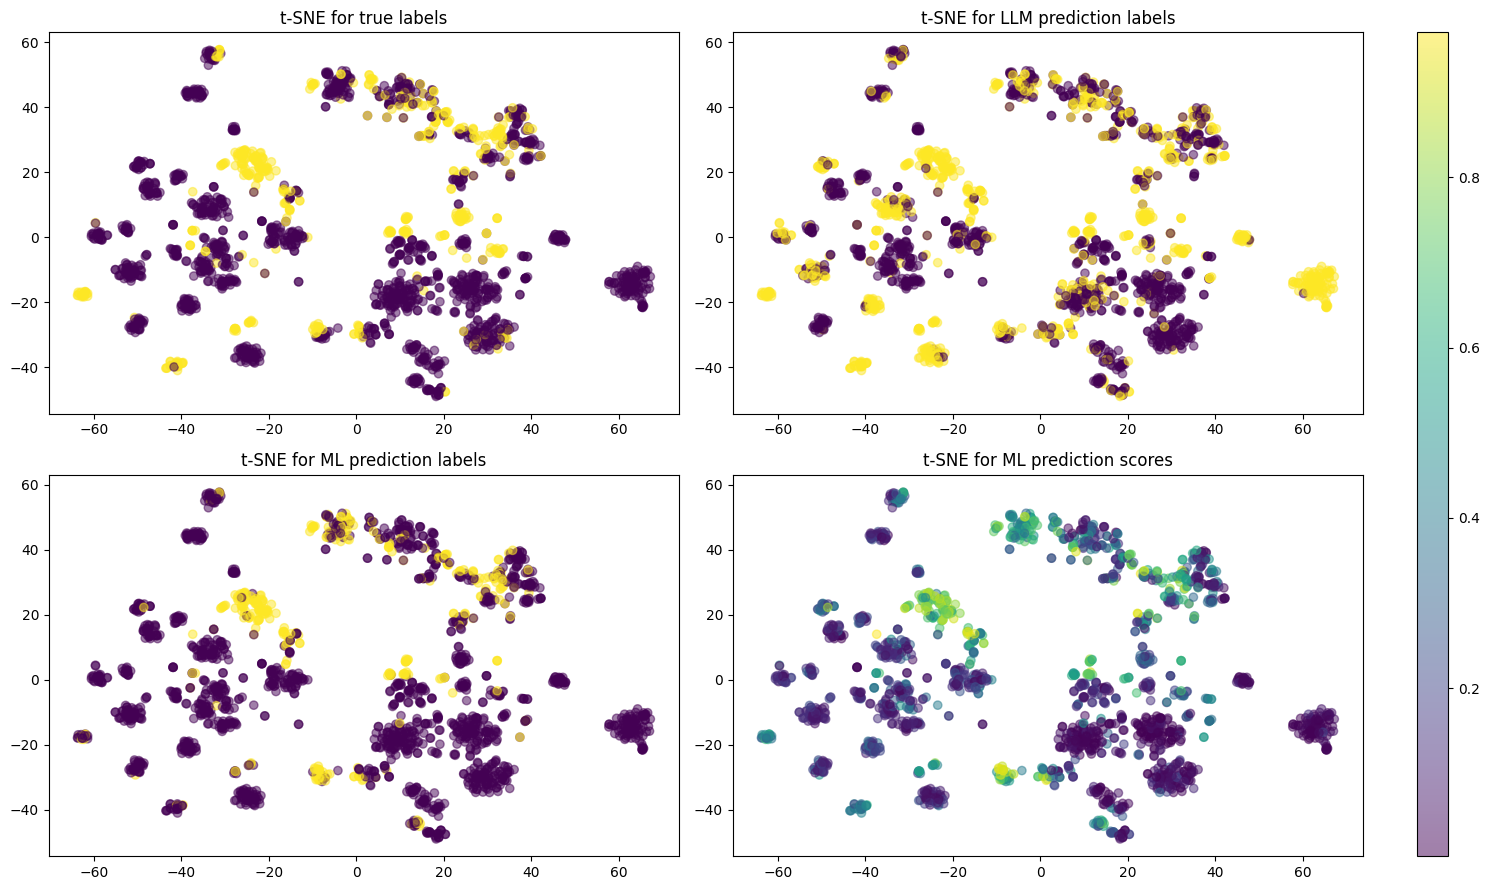

In [62]:
fig = plt.figure(figsize=(15, 9))  # Adjust the figure size to fit two rows comfortably
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1])

# Plot for label1
ax1 = fig.add_subplot(gs[0, 0]) 
scatter1 = ax1.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.5)
ax1.set_title('t-SNE for true labels')

# Plot for label2
ax2 = fig.add_subplot(gs[0, 1])  
scatter2 = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_llm, cmap='viridis', alpha=0.5)
ax2.set_title('t-SNE for LLM prediction labels')

# Plot for label3
ax3 = fig.add_subplot(gs[1, 0])  
scatter3 = ax3.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_lr, cmap='viridis', alpha=0.5)
ax3.set_title('t-SNE for ML prediction labels')


ax4 = fig.add_subplot(gs[1, 1]) 
scatter4 = ax4.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_lr_soft, cmap='viridis', alpha=0.5)
ax4.set_title('t-SNE for ML prediction scores')

cbar_ax = fig.add_subplot(gs[:, 2])  
fig.colorbar(scatter4, cax=cbar_ax)

plt.tight_layout()
plt.savefig('tSNE.png')
plt.show()